# Process segmented mesh

The first step after finishing a segmentation is to make sure that the mesh does not have holes and that there are no areas with high and low curvature that are artifacts from the segmentation process. We do all of this in ParaView, which has some nice visual features that help us process the surface mesh. The surface mesh is saved as `vessel_segmentation.vtk` so we will first convert it. The steps are below:

1) test ParaView script to see if we can correctly call the API
2) convert the mesh to an STL
3) check the number of boundary entities

## Check that we have Paraview

First we are checking our paths to paraview are correctly installed. On this machine, a M1 Apple MacBook, Paraview was installed into the `/Applications/ParaView-5.11.2.app/Contents` directory. On an Ubuntu 20.04LTS machine, we have installed it in a different local, location: `$HOME/sfw/ParaView-5.10.0-MPI-Linux-Python3.9-x86_64/bin/pvbatch`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
print('My current working directory is')
print('\t',os.getcwd())

# on Linux
paraview_pvbatch = '/home/carlosar/sfw/ParaView-5.11.2-MPI-Linux-Python3.9-x86_64/bin/pvbatch'
# on Mac
# paraview_pvbatch = '/Applications/ParaView-5.11.2.app/Contents/bin/pvbatch'
paraview_exists = os.path.isfile(paraview_pvbatch)
print(f'Does paraview exist in this path: \n\t{paraview_pvbatch}\n\t', paraview_exists)

My current working directory is
	 /home/carlosar/projects/cfdose/jupyter-server/vascular-modeling/steps
Does paraview exist in this path: 
	/home/carlosar/sfw/ParaView-5.11.2-MPI-Linux-Python3.9-x86_64/bin/pvbatch
	 True


## Conversion from 3D Slicer
The output above shows that we have paraview in the correct path, so we should be able to run our paraview scripts. We have set up a small paraview driver script that creates a temporary directory to run scripts in order to not mess with the paraview `PYTHONPATH` which is not necessarily the best. Instead what we do is:

- create a temporary directory where we copy the paraview script and mesh file we are inspecting
- copy the result of the script for inspection
- delete the temporary files

While this is not ideal, it can be better than adding a python path modifier.

## Testing the run script

Here we select the `test_paraview.py` script to run using Paraviews `pvbatch` python-cli tool. We also pass the mesh file and the location of the `pv_batch` executable from our local install of paraview.

## Setting up the output directory

We will save all processed data into a directory containing all processing of meshes. This can go anywhere, but for this set of notebooks, we are adding it to the data subdirectory.

In [3]:
from app.io import make_save_directory
desired_output_path = './data/step_01_output'
make_save_directory(desired_output_path)


In [4]:
from app.paraview_driver import run_script

script_name = 'test_paraview.py'
data_path = './data/testcase'
files = [] #no files necessary to test
run_script(paraview_pvbatch, 
           script_name, 
           data_path,
           files,
           desired_output_path, True)


--------------------------------------------------------------------------------
running paraview script: test_paraview.py
--------------------------------------------------------------------------------

test_paraview.py test_paraview


<Popen: returncode: 0 args: ['/home/carlosar/sfw/ParaView-5.11.2-MPI-Linux-P...>

## Convert from `vtk` to `stl`

We need to now convert a test mesh into `stl` format so we can use it with `gmsh`, and also check some other mesh quality items. 

In [5]:
script_name = 'convert_to_stl.py'
data_path = './data/testcase'
files = ['surface.vtk'] #no files necessary to test
run_script(paraview_pvbatch, 
           script_name, 
           data_path,
           files,
           desired_output_path, True)


--------------------------------------------------------------------------------
running paraview script: convert_to_stl.py
--------------------------------------------------------------------------------

convert_to_stl.py convert_to_stl
./temp/out.stl
./temp/screenshot.png
./data/step_01_output/convert_to_stl.stl
./data/step_01_output/convert_to_stl.png


<Popen: returncode: 0 args: ['/home/carlosar/sfw/ParaView-5.11.2-MPI-Linux-P...>

Now we can check if we converted our mesh correctly. 

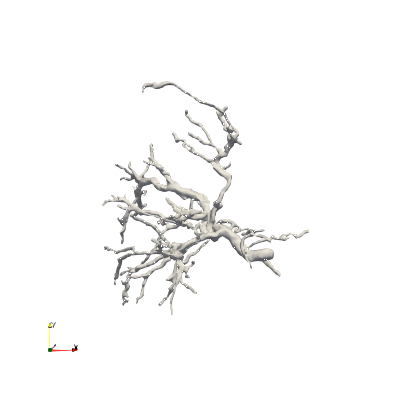

In [6]:
from IPython.display import Image

# Display the image
file_path = os.path.join(desired_output_path, 'convert_to_stl.png')
Image(filename=file_path)

We can see the image below from the conversion process, and all looks good! We can now move one to the next step, which is to create a surface mesh using the `gmsh` API.